# Classification of classy Shakespeare plays

__Problem Statement__: Determine the players from Shakespeare plays using other columns

__Data Source__: https://www.kaggle.com/kingburrito666/shakespeare-plays

__References__:

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
<br>
https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
<br>
https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

#### Step 1: Data Extraction

In [1]:
import pandas as pd

In [2]:
#Load data into data frame
players_df = pd.read_csv("../data/external/Shakespeare_data.csv")
players_df.head(3)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."


In [3]:
players_df = players_df.drop(['ActSceneLine'], axis=1)

In [4]:
#Remove null values
players_df = players_df.dropna(axis=0, subset=['Player'])  
players_df = players_df.dropna(axis=0, subset=['Play']) 
players_df = players_df.dropna(axis=0, subset=['PlayerLine']) 

players_df.head()

,Dataline,Play,PlayerLinenumber,Player,PlayerLine
3,4,Henry IV,1.0,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,KING HENRY IV,No more the thirsty entrance of this soil


In [5]:
#Number of null values after removing NaN
print(players_df.isnull().values.sum())

0


In [6]:
import matplotlib.pyplot as plt

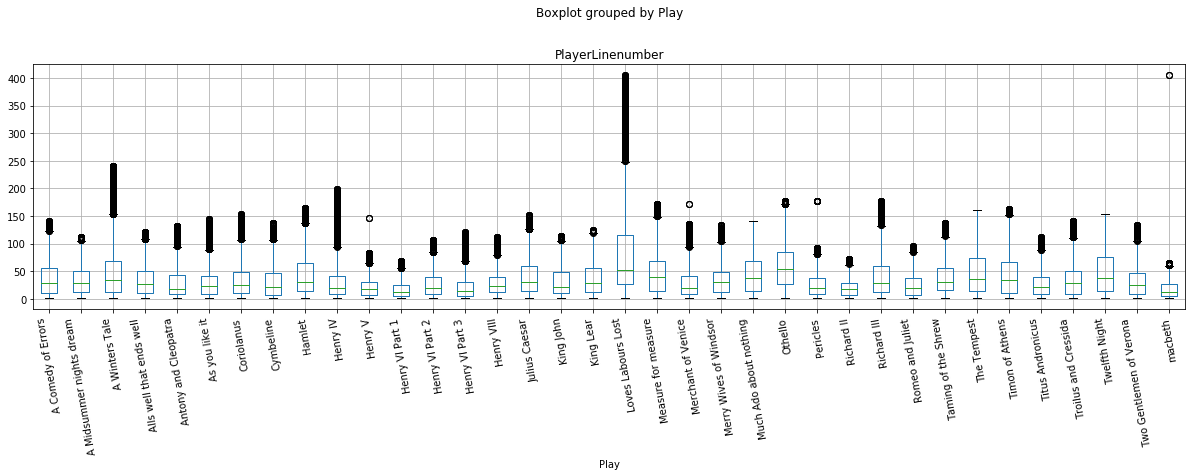

In [7]:
boxplot = players_df.boxplot(column=['PlayerLinenumber'], by='Play', layout=(2, 1), figsize=(20,10), rot=100)

In [8]:
#Check data types in dataframe
players_df.dtypes

Dataline              int64
Play                 object
PlayerLinenumber    float64
Player               object
PlayerLine           object
dtype: object

In [9]:
players_df = players_df.drop(['PlayerLinenumber'], axis=1)

In [10]:
players_df.head(5)

,Dataline,Play,Player,PlayerLine
3,4,Henry IV,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,KING HENRY IV,No more the thirsty entrance of this soil


#### Step 2: Data Tranformation

In [11]:
#One hot encoding for transforming Play column
players_df = pd.get_dummies(players_df, columns=['Play'])

In [12]:
players_df.head(3)

,Dataline,Player,PlayerLine,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
3,4,KING HENRY IV,"So shaken as we are, so wan with care,",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,KING HENRY IV,"Find we a time for frighted peace to pant,",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,KING HENRY IV,And breathe short-winded accents of new broils,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Label Encoding for transforming Player and PlayerLine columns

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
players_df['Player'] = le.fit_transform(players_df['Player'].astype('str'))

In [16]:
players_df['PlayerLine'] = le.fit_transform(players_df['PlayerLine'].astype('str'))

In [17]:
players_df.head(3)

,Dataline,Player,PlayerLine,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,...,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth
3,4,457,63730,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,457,25777,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,457,5119,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Step 3: Model Training and Testing data sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Define features
X=players_df.drop(['Player'], axis=1)

In [20]:
#Define target
y=players_df['Player']

In [21]:
#Define testing and training datasets
train_features, test_features , train_labels, test_labels = train_test_split(X, y, random_state=0)

In [22]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (83541, 38)
Training Labels Shape: (83541,)
Testing Features Shape: (27848, 38)
Testing Labels Shape: (27848,)


#### Step 4: Building Models

In [23]:
#Using Decision Tree to find the accuracy
from sklearn.tree import DecisionTreeClassifier

In [24]:
#Training the decision tree classifier
clf = DecisionTreeClassifier().fit(train_features, train_labels)

In [25]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(train_features, train_labels)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(test_features, test_labels)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.69


### Summary

1. Tried various models such as Linear Regression, Gaussian Naive Bayes, K-Nearest and Decision Tree Classifier to find the accuracy
2. Decision Tree classifier gave the best accuracy of 69% on the test data set.